<a href="https://colab.research.google.com/github/skojaku/core-periphery-detection/blob/master/examples/How_to_use_cpnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use `cpnet`

We will walk through how to use `cpnet` in stages. Specifically, we will cover the following topics.
- Setting up the environment
- Detecting discrete core-periphery structure
- Detecting continuous core-periphery structure 
- Measuring the statistical significance
- Caveat of one-core-one-periphery structure

And import the packages

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Detecting discrete core-periphery structure

As a toy example, we use the karate club network, which can be loaded using the `networkx` package. 

In [2]:
G = nx.karate_club_graph()

Now, let us detect a core-periphery structure in the network. `cpnet` offers several algorithms for detecting core-periphery structure. Here, we use a widely-used algorithm, Borgatti-Everett (BE) algorithm.

With `cpnet`, you can run the algorithm in two steps, namely creating an instance of the algorithm and feeding the network to it:

In [3]:
cd ..

c:\Users\Yasaman\core-periphery-detection-1


In [6]:
from cpnet_new import *

In [7]:
alg = BE() # Load the Borgatti-Everett algorithm
alg.detect(G) # Feed the network as an input

The algorithm will then find the core-periphery structure, which can be accessed as follows:

In [8]:
x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

Both `x` and `c` are python `dict` objects, with keys corresponding to the IDs of nodes (which we can see by `G.nodes()`).

`x[i]` indicates the *coreness* ranging between [0,1], with a larger value indicating a stronger affiliation to the core. For example, the detected `x` looks like

In [9]:
print(x)

{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 1, 33: 1}


where `x[i]=1` or `x[i]=0` means that node `i` belongs to a core or a periphery, respectively. With the BE algorithm, no node takes a fractional value (e.g., `x[i]=0.5`) because the BE algorithm detects a *discrete* core-periphery structure, a structure consisting of core and peripheral nodes without the ones with intermediate roles. 

The other `dict` object, `c`, indicates the group to which the node `i` belongs, which we will explain later on.


`cpnet` offers a simple function to visualize the detected core-periphery structure:  

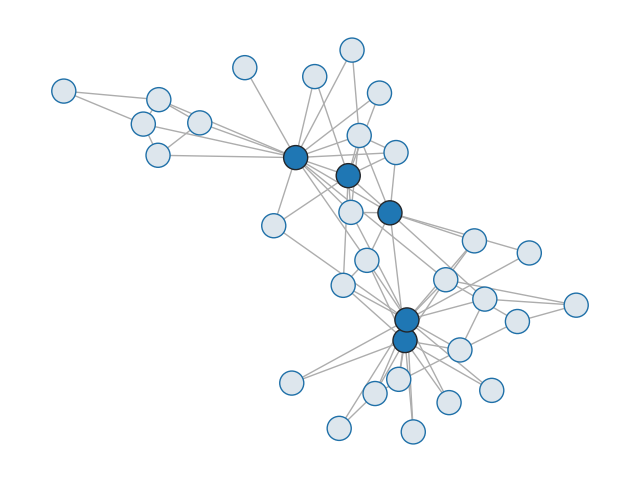

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = draw(G, c, x, ax)

where the filled and open circles indicate the detected core and periphery, respectively. 